# EDA

------------------------

In [1]:
from google.colab import drive
drive.mount('/content/drive')
path='/content/drive/MyDrive/data_tesis_mds'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!ls /content/drive/MyDrive/data_tesis_mds

consolidation_15December2022.csv  data	precleaned_07September2023.csv


In [3]:
! ls

drive  sample_data


----------------------------------------------

In [2]:
import warnings
warnings.filterwarnings("ignore")

from pathlib import Path
import json
from io import StringIO

import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
from numpy import mean,sqrt,square
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from datetime import timedelta
from tqdm.notebook import tqdm_notebook
from tqdm import tqdm
pd.set_option('display.max_columns', None)

In [3]:
#!pip install pacmap
#import pacmap
import plotly.io as pio
from IPython.display import Image
!pip install -U kaleido

In [4]:
!pip install pandarallel
from pandarallel import pandarallel
pandarallel.initialize(progress_bar=False, nb_workers=16)

INFO: Pandarallel will run on 16 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [5]:
tags=['granulometry', 'charge cell', 'speed', 'solid percentage', 'water','TPH', 'HH TPH', 'LL charge cell', 'HH charge cell',

#"loss of TPH","start loss of TPH"	,"end loss of TPH",		"start low load cell",	"end low load cell",		"start high load cell",	"end high load cell","high load cell","low load cell",
#"Optimizando tonelaje","Limitado por Peso",
"delta HH TPH",
#'pyrite law', 'chalcopyrite law','chalcocite law', 'crusher index', 'ball work index','bornite law','covelin law',
'sag power index',

"Edad"
]

In [6]:
file_path = Path().joinpath(path,"data","processed data","cleaned_"+pd.to_datetime('today').strftime('%d%B%Y')+'.csv',)

with open(file_path, 'r') as file:
    content = file.read()

# parse consolidation to df
df_clean = pd.read_csv(StringIO(content),parse_dates=['Timestamp'], index_col='Timestamp')
df_clean.head()

,granulometry,charge cell,speed,solid percentage,water,TPH,HH TPH,LL charge cell,HH charge cell,loss of TPH,start loss of TPH,end loss of TPH,start low load cell,end low load cell,start high load cell,end high load cell,delta HH TPH,high load cell,low load cell,pyrite law,chalcopyrite law,chalcocite law,crusher index,sag power index,ball work index,bornite law,covelin law,Edad
Timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-01-01 00:03:00,62.811786,858.914758,9.062208,65.085609,2089.536865,3894.792946,4350.0,820.0,900.0,1,0,0,0,0,0,0,455.207054,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2018-01-01 00:04:00,62.749109,857.932221,9.062822,65.271563,2110.715057,3959.416847,4350.0,820.0,900.0,1,0,0,0,0,0,0,390.583153,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2018-01-01 00:05:00,62.731017,857.681061,9.062958,65.213058,2122.028610,3972.132198,4350.0,820.0,900.0,1,0,0,0,0,0,0,377.867802,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2018-01-01 00:06:00,62.681308,860.322055,9.061771,65.283561,2141.409208,4023.434325,4350.0,820.0,900.0,1,0,0,0,0,0,0,326.565675,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2018-01-01 00:07:00,62.677879,863.085639,9.062551,65.206578,2155.794501,4036.253188,4350.0,820.0,900.0,1,0,0,0,0,0,0,313.746812,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


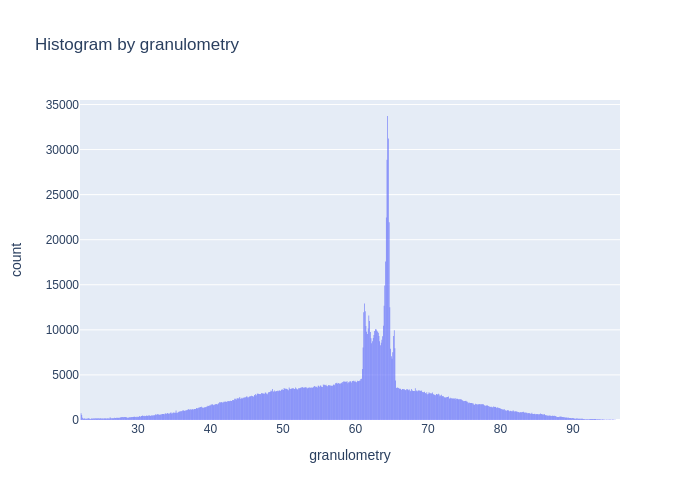

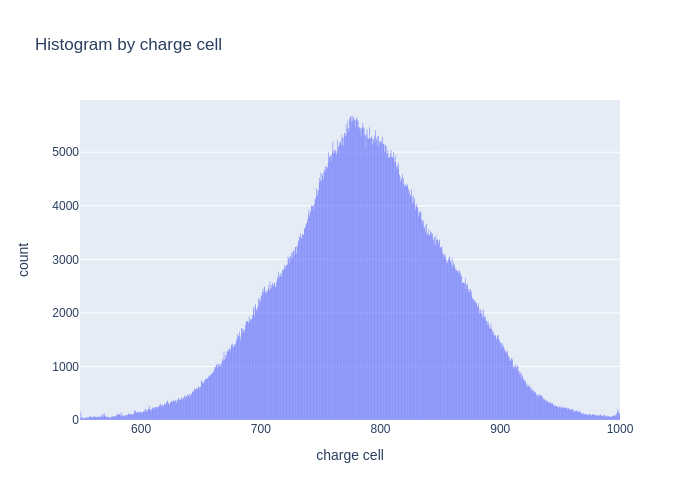

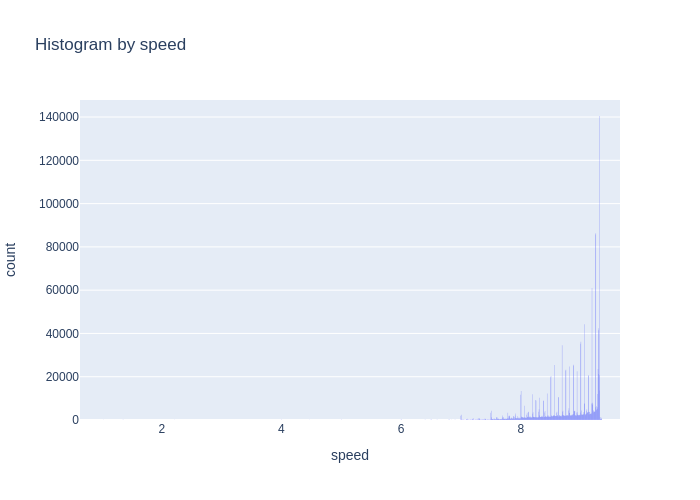

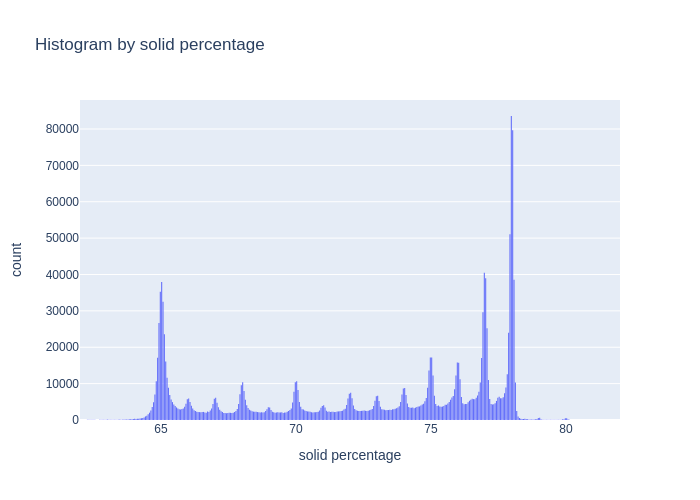

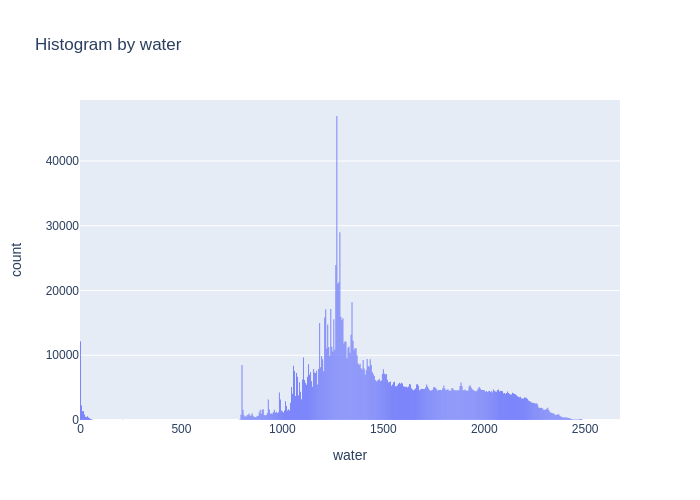

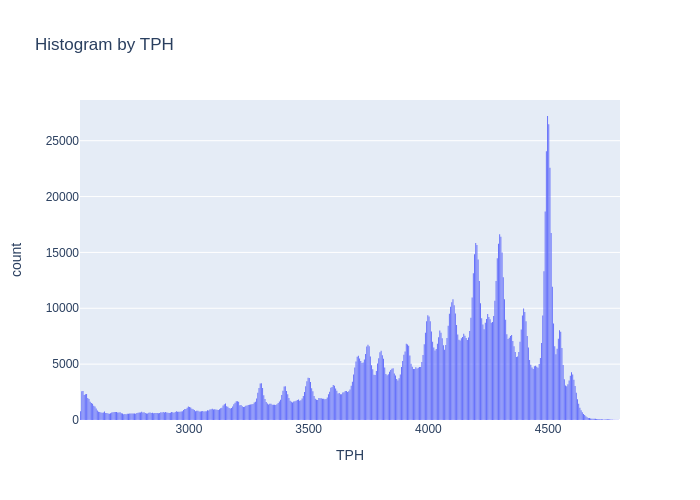

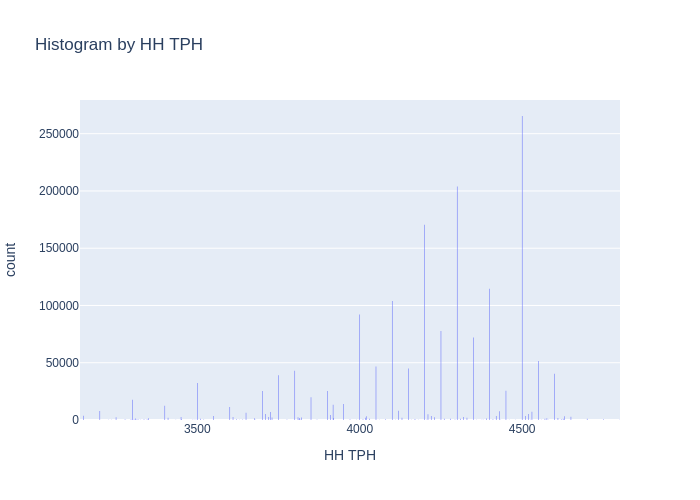

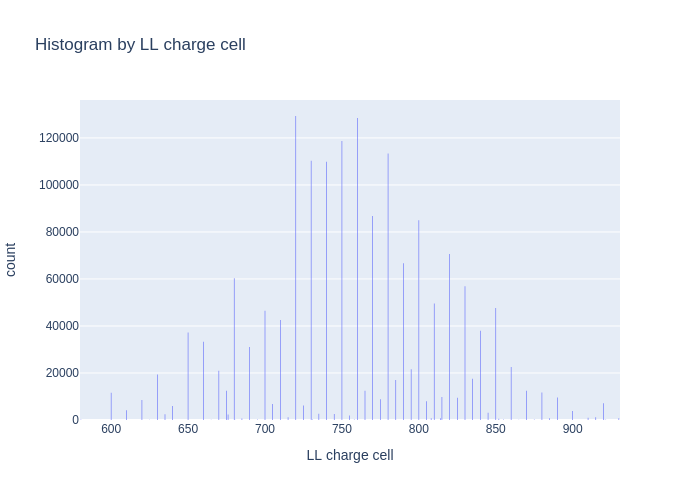

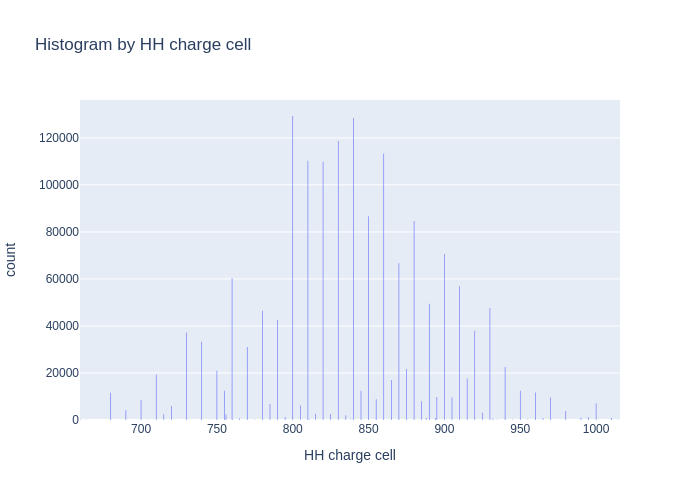

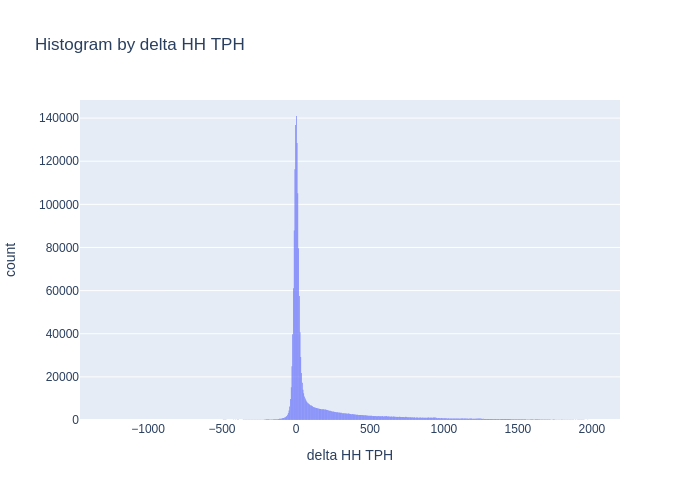

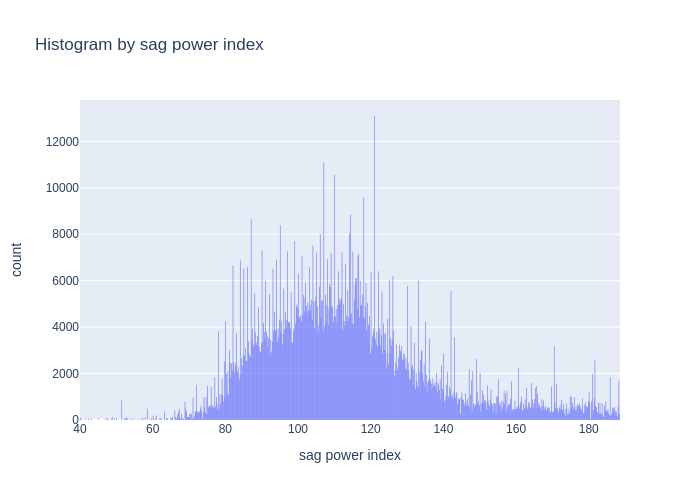

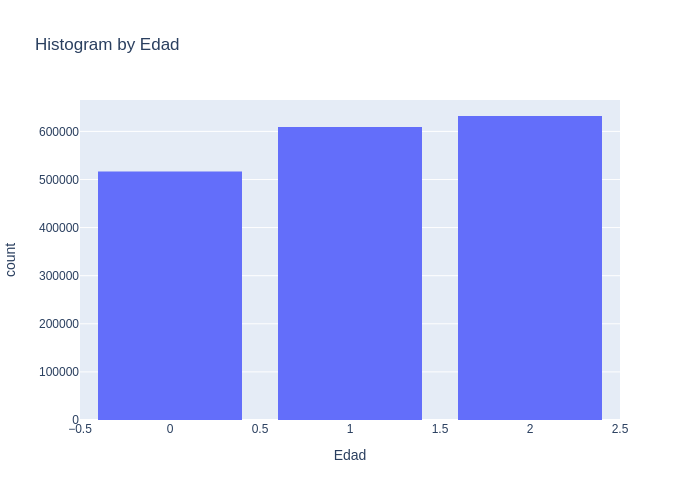

In [7]:
# Histograms by Restricción
for rest in tags:
    fig = px.histogram(
        df_clean,
        x=rest,
        #color="Restricción",
        #nbins=20,
        title=f"Histogram by {rest}",
    )
    #fig.update_traces(marker_color="#01515F")
    fig.update_layout(yaxis=dict(tickformat=".0f"), #plot_bgcolor="white"
    )
    fig.update_layout(height=500, width=700, bargap=0.2)

    pio.write_image(
        fig,
        f"photo.png",
    )
    display(Image(f"photo.png"))
    # fig.show()

In [14]:
df_corr = df_clean[tags].dropna().corr()

In [15]:
df_corr

,granulometry,charge cell,speed,solid percentage,water,TPH,HH TPH,LL charge cell,HH charge cell,delta HH TPH,sag power index,Edad
granulometry,1.000000,-0.066139,-0.186501,0.295238,-0.197542,0.126928,0.021188,0.067270,0.067262,-0.158315,-0.061938,-0.059748
charge cell,-0.066139,1.000000,0.263635,-0.298040,0.216878,-0.208827,-0.138102,0.883124,0.883108,0.157026,0.097403,-0.595753
speed,-0.186501,0.263635,1.000000,-0.299410,0.597414,0.136540,0.105422,0.096653,0.096665,-0.087516,0.193049,-0.034207
solid percentage,0.295238,-0.298040,-0.299410,1.000000,-0.770276,0.333486,-0.004451,-0.147791,-0.147811,-0.476190,-0.251442,0.049133
water,-0.197542,0.216878,0.597414,-0.770276,1.000000,0.213465,0.313104,0.039564,0.039606,0.011753,0.132981,0.022769
TPH,0.126928,-0.208827,0.136540,0.333486,0.213465,1.000000,0.707273,-0.215077,-0.215024,-0.705904,-0.220630,0.167613
HH TPH,0.021188,-0.138102,0.105422,-0.004451,0.313104,0.707273,1.000000,-0.192692,-0.192640,0.001464,-0.133807,0.211905
LL charge cell,0.067270,0.883124,0.096653,-0.147791,0.039564,-0.215077,-0.192692,1.000000,0.999985,0.111171,0.074710,-0.664646
HH charge cell,0.067262,0.883108,0.096665,-0.147811,0.039606,-0.215024,-0.192640,0.999985,1.000000,0.111148,0.074692,-0.664605
delta HH TPH,-0.158315,0.157026,-0.087516,-0.476190,0.011753,-0.705904,0.001464,0.111171,0.111148,1.000000,0.178025,-0.024781


In [17]:
fig=px.imshow(df_corr,
          labels=dict(x="", y="", color="Correlation"),
          x=tags,
          y=tags,
          zmin=-1,
          zmax=1,
          )
fig.update_layout(width=1000, height=1000,title="Correlación entre variables")
fig.show()

In [20]:
corr_tph=pd.DataFrame(df_corr.abs().TPH.sort_values(ascending=False))
top_corr=corr_tph#[corr_tph.TPH>=0.1]
top_corr

,TPH
TPH,1.000000
HH TPH,0.707273
delta HH TPH,0.705904
solid percentage,0.333486
sag power index,0.220630
LL charge cell,0.215077
HH charge cell,0.215024
water,0.213465
charge cell,0.208827
Edad,0.167613


In [21]:
corr_tph=pd.DataFrame(df_corr.abs()["charge cell"].sort_values(ascending=False))
top_corr=corr_tph#[corr_tph["charge cell"]>=0.1]
top_corr

,charge cell
charge cell,1.000000
LL charge cell,0.883124
HH charge cell,0.883108
Edad,0.595753
solid percentage,0.298040
speed,0.263635
water,0.216878
TPH,0.208827
delta HH TPH,0.157026
HH TPH,0.138102
